In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import fastai
from fastai.vision import *

from torchvision import models
from visualization.modules import LayeredModule, get_nested_layers
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
path = Path("/home/jupyter/fai-berlin-faces/cropped/")
#verify_images(path, recurse=True)


In [3]:
def isFemale(path): return bool(int(path.name.split('_')[1]))

def get_gender(path):
   # print(path, "path here")
    return "female" if isFemale(path) else "male"


In [4]:
data = ( ImageList.from_folder(path) \
           # .filter_by_func() \
            .split_by_rand_pct(0.2) \
            .label_from_func(get_gender) \
            .databunch() \
            .normalize() )

In [5]:
learner = cnn_learner(data, models.vgg19, metrics=[accuracy])

In [6]:
fastai.layers.AdaptiveConcatPool2d

fastai.layers.AdaptiveConcatPool2d

In [7]:
type(learner.model[1][0])

fastai.layers.AdaptiveConcatPool2d

In [8]:
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): C

In [9]:
[t for t, _ in get_nested_layers(learner.model)]

['0-0-conv-0',
 '0-0-relu-0',
 '0-0-conv-1',
 '0-0-relu-1',
 '0-0-pool-0',
 '0-0-conv-2',
 '0-0-relu-2',
 '0-0-conv-3',
 '0-0-relu-3',
 '0-0-pool-1',
 '0-0-conv-4',
 '0-0-relu-4',
 '0-0-conv-5',
 '0-0-relu-5',
 '0-0-conv-6',
 '0-0-relu-6',
 '0-0-conv-7',
 '0-0-relu-7',
 '0-0-pool-2',
 '0-0-conv-8',
 '0-0-relu-8',
 '0-0-conv-9',
 '0-0-relu-9',
 '0-0-conv-10',
 '0-0-relu-10',
 '0-0-conv-11',
 '0-0-relu-11',
 '0-0-pool-3',
 '0-0-conv-12',
 '0-0-relu-12',
 '0-0-conv-13',
 '0-0-relu-13',
 '0-0-conv-14',
 '0-0-relu-14',
 '0-0-conv-15',
 '0-0-relu-15',
 '0-0-pool-4',
 '1-AdaptiveConcatPool2d-0',
 '1-Flatten-0',
 '1-BatchNorm1d-0',
 '1-dropout-0',
 '1-linear-0',
 '1-relu-0',
 '1-BatchNorm1d-1',
 '1-dropout-1',
 '1-linear-1']

In [10]:
learner.unfreeze()

In [11]:
a = LayeredModule(get_nested_layers(learner.model))

In [12]:
list((x, p.requires_grad, p.device) for x, p in learner.model.named_parameters())

[('0.0.0.weight', True, device(type='cuda', index=0)),
 ('0.0.0.bias', True, device(type='cuda', index=0)),
 ('0.0.2.weight', True, device(type='cuda', index=0)),
 ('0.0.2.bias', True, device(type='cuda', index=0)),
 ('0.0.5.weight', True, device(type='cuda', index=0)),
 ('0.0.5.bias', True, device(type='cuda', index=0)),
 ('0.0.7.weight', True, device(type='cuda', index=0)),
 ('0.0.7.bias', True, device(type='cuda', index=0)),
 ('0.0.10.weight', True, device(type='cuda', index=0)),
 ('0.0.10.bias', True, device(type='cuda', index=0)),
 ('0.0.12.weight', True, device(type='cuda', index=0)),
 ('0.0.12.bias', True, device(type='cuda', index=0)),
 ('0.0.14.weight', True, device(type='cuda', index=0)),
 ('0.0.14.bias', True, device(type='cuda', index=0)),
 ('0.0.16.weight', True, device(type='cuda', index=0)),
 ('0.0.16.bias', True, device(type='cuda', index=0)),
 ('0.0.19.weight', True, device(type='cuda', index=0)),
 ('0.0.19.bias', True, device(type='cuda', index=0)),
 ('0.0.21.weight',

In [13]:
women = learner.data.x[22].data
women.requires_grad_()
women = women.cuda()
women[None].shape


torch.Size([1, 3, 200, 200])

In [14]:
list(x for x, _ in a.named_parameters())

['layers.0-0-conv-0.weight',
 'layers.0-0-conv-0.bias',
 'layers.0-0-conv-1.weight',
 'layers.0-0-conv-1.bias',
 'layers.0-0-conv-2.weight',
 'layers.0-0-conv-2.bias',
 'layers.0-0-conv-3.weight',
 'layers.0-0-conv-3.bias',
 'layers.0-0-conv-4.weight',
 'layers.0-0-conv-4.bias',
 'layers.0-0-conv-5.weight',
 'layers.0-0-conv-5.bias',
 'layers.0-0-conv-6.weight',
 'layers.0-0-conv-6.bias',
 'layers.0-0-conv-7.weight',
 'layers.0-0-conv-7.bias',
 'layers.0-0-conv-8.weight',
 'layers.0-0-conv-8.bias',
 'layers.0-0-conv-9.weight',
 'layers.0-0-conv-9.bias',
 'layers.0-0-conv-10.weight',
 'layers.0-0-conv-10.bias',
 'layers.0-0-conv-11.weight',
 'layers.0-0-conv-11.bias',
 'layers.0-0-conv-12.weight',
 'layers.0-0-conv-12.bias',
 'layers.0-0-conv-13.weight',
 'layers.0-0-conv-13.bias',
 'layers.0-0-conv-14.weight',
 'layers.0-0-conv-14.bias',
 'layers.0-0-conv-15.weight',
 'layers.0-0-conv-15.bias',
 'layers.1-BatchNorm1d-0.weight',
 'layers.1-BatchNorm1d-0.bias',
 'layers.1-linear-0.weight

In [19]:
nl = NetLens(a.cuda(), women[None], 0)

In [20]:
nl.generate_cam("0-0-relu-14")

tensor([[0.0952, 0.0952, 0.0952,  ..., 0.0562, 0.0562, 0.0562],
        [0.0952, 0.0952, 0.0952,  ..., 0.0562, 0.0562, 0.0562],
        [0.0952, 0.0952, 0.0952,  ..., 0.0562, 0.0562, 0.0562],
        ...,
        [0.7641, 0.7641, 0.7641,  ..., 0.3274, 0.3274, 0.3274],
        [0.7641, 0.7641, 0.7641,  ..., 0.3274, 0.3274, 0.3274],
        [0.7641, 0.7641, 0.7641,  ..., 0.3274, 0.3274, 0.3274]],
       device='cuda:0')

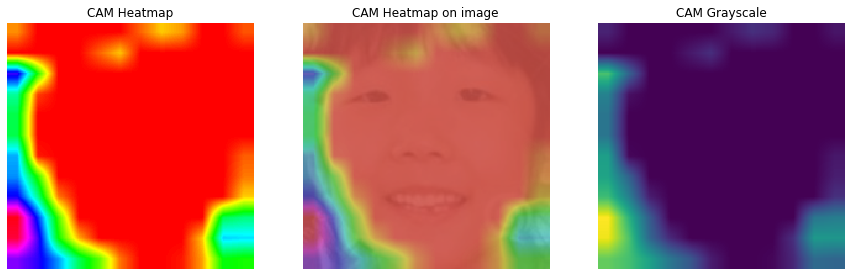

In [21]:
nl.show_gradcam("0-0-relu-14")

In [ ]:
from fastai.utils.mem import * 
gpu_mem_get_all()
#free = gpu_mem_get_free_no_cache()
#free